In [45]:
import pandas as pd
data = pd.read_csv(r"D:\Medical Cost Prediction\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)

# encoded_data = ohe.fit_transform(data[['sex','region','smoker']])
# ohe_data = pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(["sex","region","smoker"])).astype(int)
# ohe_data

In [48]:
#perform one-hot-encoding to convert the data into numerical format
encoded_df = pd.get_dummies(data[["sex","region","smoker"]],drop_first=True).astype(int)
encoded_df

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,0,0,0,1,1
1,1,0,1,0,0
2,1,0,1,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
1333,1,1,0,0,0
1334,0,0,0,0,0
1335,0,0,1,0,0
1336,0,0,0,1,0


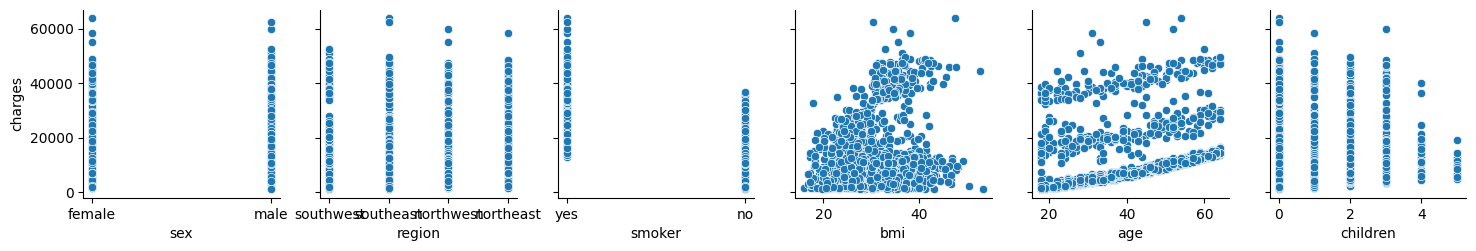

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    data,
    x_vars=["sex","region","smoker","bmi","age","children"],
    y_vars=["charges"],
)

plt.show()

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df = pd.concat([data,encoded_df],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0


In [53]:
df = df.drop(columns=["sex","region","smoker"])
df

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


In [54]:
#now scale down the values of columns age and bmi between 0 and 1 using StandardScalar()

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df["age"] = sc.fit_transform(df[["age"]])
df["bmi"] = sc.fit_transform(df[["bmi"]])
df

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,0.021739,0.321227,0,16884.92400,0,0,0,1,1
1,0.000000,0.479150,1,1725.55230,1,0,1,0,0
2,0.217391,0.458434,3,4449.46200,1,0,1,0,0
3,0.326087,0.181464,0,21984.47061,1,1,0,0,0
4,0.304348,0.347592,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,3,10600.54830,1,1,0,0,0
1334,0.000000,0.429379,0,2205.98080,0,0,0,0,0
1335,0.000000,0.562012,0,1629.83350,0,0,1,0,0
1336,0.065217,0.264730,0,2007.94500,0,0,0,1,0


In [55]:
x = df.drop(columns=["charges"])
y = df["charges"]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
#use various supervised machine learning models and check the similarity metrics
#using decisiontree classifier

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
print("percentage of accuracy using DecisionTree Regressor algorithm {}".format(r2_score))

percentage of accuracy using DecisionTree Regressor algorithm 0.7242693953817081


In [64]:
#now using RandomForest to predict
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)

model.fit(x_train,y_train)
training_score = model.score(x_train,y_train)
print("percentage of training accuracy using Random Forest Regressor {}".format(training_score))
y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("percentage of accuracy using random forest algorithm {}".format(score))

percentage of training accuracy using Random Forest Regressor 0.9645308512146034
percentage of accuracy using random forest algorithm 0.8432188156399142


In [65]:
#now using xgboost regressor approach
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1,learning_rate=1)
model.fit(x_train,y_train)
training_score = model.score(x_train,y_train)
print("Training accuracy score using xb-boost model {}".format(training_score))

y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("percentage of accuracy using xg-boost regressor algorithm {}".format(score))

Training accuracy score using xb-boost model 0.880192405847323
percentage of accuracy using xg-boost regressor algorithm 0.846639804677651


In [66]:
#using catboost regressor for training
from catboost import CatBoostRegressor
model = CatBoostRegressor(n_estimators=10,learning_rate=0.1)

model.fit(x_train,y_train,verbose=True)
from sklearn.metrics import accuracy_score
training_score = model.score(x_train,y_train)
print("Printing the training accuracy score of the model {}".format(training_score))

y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
errorratio = r2_score(y_test,y_pred)
print("percentage of accuracy using catboost regressor model is {}".format(errorratio))

0:	learn: 11224.8273688	total: 1.01ms	remaining: 9.06ms
1:	learn: 10466.1897855	total: 2.17ms	remaining: 8.7ms
2:	learn: 9814.6616327	total: 3.1ms	remaining: 7.24ms
3:	learn: 9165.4283967	total: 4.09ms	remaining: 6.14ms
4:	learn: 8604.6299449	total: 5.04ms	remaining: 5.04ms
5:	learn: 8072.6676068	total: 6.01ms	remaining: 4.01ms
6:	learn: 7612.3089720	total: 6.96ms	remaining: 2.98ms
7:	learn: 7263.2863662	total: 7.87ms	remaining: 1.97ms
8:	learn: 6913.2409873	total: 8.78ms	remaining: 975us
9:	learn: 6609.0129320	total: 9.68ms	remaining: 0us
Printing the training accuracy score of the model 0.7017851379907686
percentage of accuracy using catboost regressor model is 0.7083942594430646


In [71]:
#now using GridSearch_CV on CatBoost Regressor
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostRegressor
params = {
    'depth': [4,6,8,10],
    'learning_rate': [0.1,0.01],
    'n_estimators': [10,50,100]
}

model = CatBoostRegressor()
search = GridSearchCV(model,params,cv=5)
search.fit(x_train,y_train)

print("Best params:", search.best_params_)
print("Best R²:", search.best_score_)

0:	learn: 11105.4796599	total: 684us	remaining: 6.16ms
1:	learn: 10361.7428930	total: 1.63ms	remaining: 6.51ms
2:	learn: 9726.3202330	total: 2.12ms	remaining: 4.95ms
3:	learn: 9102.5246669	total: 2.77ms	remaining: 4.16ms
4:	learn: 8582.3995582	total: 3.27ms	remaining: 3.27ms
5:	learn: 8071.2725332	total: 3.9ms	remaining: 2.6ms
6:	learn: 7665.8724688	total: 4.46ms	remaining: 1.91ms
7:	learn: 7280.5366906	total: 4.93ms	remaining: 1.23ms
8:	learn: 6907.6712460	total: 5.41ms	remaining: 601us
9:	learn: 6570.5459294	total: 6.09ms	remaining: 0us
0:	learn: 10917.6168973	total: 546us	remaining: 4.92ms
1:	learn: 10201.2849295	total: 1.06ms	remaining: 4.23ms
2:	learn: 9583.8065854	total: 1.62ms	remaining: 3.78ms
3:	learn: 8980.5865101	total: 2.19ms	remaining: 3.28ms
4:	learn: 8478.6721306	total: 2.86ms	remaining: 2.86ms
5:	learn: 7990.4966229	total: 3.35ms	remaining: 2.23ms
6:	learn: 7610.7116375	total: 3.85ms	remaining: 1.65ms
7:	learn: 7237.8873688	total: 4.31ms	remaining: 1.08ms
8:	learn: 6913

In [72]:
#now using GridSearch CV on XGBoost
from xgboost import XGBRegressor

model = XGBRegressor()

params = {
    'n_estimators': [10,50,100],
    'max_depth': [4,6,8,10],
    'learning_rate': [0.1,0.01]
}

search = GridSearchCV(model,params,cv=5)
search.fit(x_train,y_train)
print("Best params:", search.best_params_)
print("Best R²:", search.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best R²: 0.8360140424739948


In [ ]:
#now using GridSearchCV on DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

params = {
    'splitter': ['best','random'],
    'max_features': ['log2','sqrt']
}

search = GridSearchCV(model,params,cv=5)
search.fit(x_train,y_train)
print("Best params:", search.best_params_)
print("Best R²:", search.best_score_)

Best params: {'max_features': 'log2', 'splitter': 'best'}
Best R²: 0.6420045476576803


In [81]:
#now using RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

params = {
    'n_estimators': [10,50,100],
    'max_features': ['log2','sqrt'],
    'max_depth': [2,6,9],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf': [1,2,5,10]
}

search = GridSearchCV(model,params,cv=5)
search.fit(x_train,y_train)
print("Best params:", search.best_params_)
print("Best R²:", search.best_score_)

Best params: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R²: 0.8320992052982848
